**About the Dataset**:- 

Coronavirus Source Data

complete COVID-19 dataset is a collection of the COVID-19 data maintained by Our World in Data. It is updated daily and includes data on confirmed cases, deaths, and testing.

1. **Deaths and cases**:-  our data source
In this document, the many linked charts, our COVID-19 Data Explorer, and the Complete COVID-19 dataset we report and visualize the data on confirmed cases and deaths from Johns Hopkins University (JHU). We make the data used in our charts and tables downloadable as a complete and structured .csv, .xlsx and json file here on our GitHub site.

The Johns Hopkins University dashboard and dataset is maintained by a team at its Center for Systems Science and Engineering (CSSE). It has been publishing updates on confirmed cases and deaths for all countries since January 22, 2020. A feature on the JHU dashboard and dataset was published in The Lancet in early May 2020.1 This has allowed millions of people across the world to track the course and evolution of the pandemic.

JHU updates its data multiple times each day. This data is sourced from governments, national and subnational agencies across the world — a full list of data sources for each country is published on Johns Hopkins GitHub site. It also makes its data publicly available there.

Note that on November 30, Our World in Data transitioned from the European Center for Disease Prevention and Control (ECDC) to Johns Hopkins University as our source for confirmed cases and deaths. This followed the ECDC’s announcement that they were switching from daily to weekly updates. More information on this change can be found here.

2.** Testing: the Our World in Data testing database**:-

Testing data is collected by Our World in Data by browsing public information from official sources. We rely on figures published on official websites, in press releases and by social media accounts of national authorities—usually governments, ministries of health, or centres for disease control.



In [1]:
# Importing necessary libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
%matplotlib inline
sns.set()

In [2]:
# import dataset
data  = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101129,ZWE,Africa,Zimbabwe,2021-07-04,54474.0,809.0,1147.429,1878.0,19.0,20.286,3665.092,54.431,77.201,126.355,1.278,1.365,1.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3361.0,683467.0,45.985,0.226,7500.0,0.505,0.153,6.5,tests performed,1361210.0,793077.0,568133.0,1623.0,12279.0,9.16,5.34,3.82,826.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
101130,ZWE,Africa,Zimbabwe,2021-07-05,56014.0,1540.0,1247.143,1911.0,33.0,23.143,3768.706,103.614,83.910,128.575,2.220,1.557,1.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3635.0,687102.0,46.229,0.245,7581.0,0.510,0.165,6.1,tests performed,1369436.0,797715.0,571721.0,8226.0,10040.0,9.21,5.37,3.85,676.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
101131,ZWE,Africa,Zimbabwe,2021-07-06,57963.0,1949.0,1347.143,1939.0,28.0,25.429,3899.837,131.132,90.638,130.459,1.884,1.711,1.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10598.0,697700.0,46.942,0.713,7830.0,0.527,0.172,5.8,tests performed,1382567.0,807633.0,574934.0,13131.0,9567.0,9.30,5.43,3.87,644.0,NaN,14862927.0,

spread of Covid-19 cases in India

In [3]:
#covid cases in india

india =  data[data["location"]== "India"]

In [4]:
india.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
41819,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
41820,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
41821,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
41822,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
41823,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,0.002,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN


In [5]:

india.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
count,5.260000e+02,526.000000,521.000000,485.000000,485.000000,521.000000,526.000000,526.000000,521.000000,485.000000,485.000000,521.000000,479.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.560000e+02,4.660000e+02,466.000000,456.000000,4.750000e+02,475.000000,475.000000,475.000000,1.700000e+02,1.700000e+02,1.410000e+02,1.650000e+02,1.740000e+02,170.000000,170.000000,141.000000,174.000000,523.000000,5.260000e+02,5.260000e+02,5.260000e+02,5.260000e+02,5.260000e+02,5.260000e+02,5.260000e+02,5.260000e+02,5.260000e+02,5.260000e+02,5.260000e+02,5.260000e+02,5.260000e+02,5.260000e+02,5.260000e+02,0.0
mean,8.393389e+06,58465.684411,58782.319727,122747.643299,836.987629,774.401441,6082.146890,42.366298,42.595758,88.947274,0.606501,0.561146,1.133466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.091064e+05,1.386441e+08,100.466433,0.658783,8.798216e+05,0.637560,0.065467,23.801053,1.212953e+08,9.927961e+07,2.654380e+07,2.117081e+06,2.016388e+06,8.789412,7.194235,1.923404,1461.132184,71.498356,1.380004e+09,4.504190e+02,2.820000e+01,5.989000e+00,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01,6.450000e-01,NaN
std,8.886962e+06,85638.560588,85462.856447,107555.770780,1084.446858,1040.582435,6439.806906,62.056732,61.929410,77.938739,0.785809,0.754045,0.315464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.464806e+05,1.239454e+08,89.815215,0.468464,6.296130e+05,0.456229,0.047099,15.475012,1.090594e+08,8.834292e+07,2.029539e+07,1.726799e+06,1.432319e+06,7.902695,6.401979,1.470510,1037.913408,21.108114,0.000000e+00,3.755237e-12,2.560389e-13,2.489267e-14,1.111280e-14,7.920136e-11,9.957068e-14,9.672580e-13,4.978534e-14,1.578017e-14,1.991414e-13,4.978534e-13,1.222408e-15,2.560389e-13,1.111280e-15,NaN
min,1.000000e+00,0.000000,0.000000,1.000000,-1.000000,0.000000,0.001000,0.000000,0.000000,0.001000,-0.001000,0.000000,0.680000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.570000e+02,6.500000e+03,0.005000,0.000000,1.121000e+03,0.001000,0.016000,4.400000,0.000000e+00,0.000000e+00,7.668000e+03,5.671000e+03,1.121500e+05,0.000000,0.000000,0.000000,81.000000,10.190000,1.380004e+09,4.504190e+02,2.820000e+01,5.989000e+00,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01,6.450000e-01,NaN
25%,2.787608e+05,9168.000000,10614.286000,22123.000000,142.000000,109.714000,201.999750,6.643250,7.691000,16.031000,0.103000,0.080000,0.910000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.567955e+05,1.385588e+07,10.040500,0.259000,2.890635e+05,0.209500,0.033000,11.800000,1.425723e+07,1.180277e+07,7.491696e+06,5.528700e+05,4.872400e+05,1.032500,0.852500,0.540000,352.750000,63.430000,1.380004e+09,4.504190e+02,2.820000e+01,5.989000e+00,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e

In [6]:
india.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
42340,IND,Asia,India,2021-07-04,30585229.0,39796.0,43699.714,402728.0,723.0,856.857,22163.139,28.838,31.666,291.831,0.524,0.621,0.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1838490.0,418254953.0,303.082,1.332,1998550.0,1.448,0.022,45.7,samples tested,347378550.0,284455266.0,62923284.0,3077960.0,4192591.0,25.17,20.61,4.56,3038.0,81.94,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
42341,IND,Asia,India,2021-07-05,30619932.0,34703.0,43290.714,403281.0,553.0,806.286,22188.286,25.147,31.370,292.232,0.401,0.584,0.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1522504.0,419777457.0,304.186,1.103,1915168.0,1.388,0.023,44.2,samples tested,351229497.0,286751758.0,64477739.0,3850947.0,4257988.0,25.45,20.78,4.67,3085.0,81.94,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
42342,IND,Asia,India,2021-07-06,30663665.0,43733.0,42973.857,404211.0,930.0,822.429,22219.976,31.690,31.140,292.906,0.674,0.596,0.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1647424.0,421424881.0,305.379,1.194,1897942.0,1.375,0.023,44.2,samples tested,354307646.0,288782557.0,65525089.0,3078149.0,3840533.0,25.67,20.93,4.75,2783.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
42343,IND,Asia,India,2021-07-07,30709557.0,45892.0,42560.429,405028.0,817.0,795.571,22253.231,33.255,30.841,293.498,0.592,0.576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1907216.0,423332097.0,306.761,1.382,1890293.0,1.370,0.023,44.4,samples tested,358070763.0,291184757.0,66886006.0,3763117.0,4130375.0,25.95,21.10,4.85,2993.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
42344,IND,Asia,India,2021-07-08,30752950.0,43393.0,42099.857,405939.0,911.0,803.857,22284.676,31.444,30.507,294.158,0.660,0.583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361685858.0,293508847.0,68177011.0,3615095.0,3849173.0,26.21,21.27,4.94,2789.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN


**Data visulization**

COVID 19 cases in india

Time Series ANalysis

In [7]:
#
covid1= india[["date","total_cases"]]
covid1.head()

,date,total_cases
41819,2020-01-30,1.0
41820,2020-01-31,1.0
41821,2020-02-01,1.0
41822,2020-02-02,2.0
41823,2020-02-03,3.0


In [8]:
covid1.shape

(526, 2)

INDEXING

In [9]:
covid1['date'] = pd.to_datetime(covid1['date'], format='%Y-%m')
covid1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526 entries, 41819 to 42344
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         526 non-null    datetime64[ns]
 1   total_cases  526 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.3 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
covid1 = covid1.set_index('date')

In [11]:
covid1.head()

,total_cases
date,
2020-01-30,1.0
2020-01-31,1.0
2020-02-01,1.0
2020-02-02,2.0
2020-02-03,3.0


Time Series Aalysis

Plot time series **data** bold text

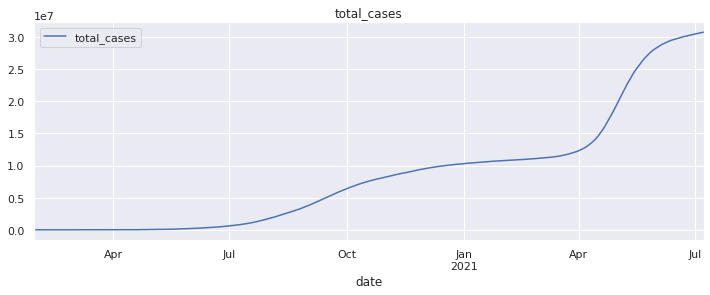

In [12]:
covid1.plot(kind='line',figsize=(12, 4))
plt.legend(loc='best')
plt.title('total_cases')
plt.show(block=False)

In [13]:
covid1.isnull().sum()

total_cases    0
dtype: int64

In [14]:

covid1.total_cases.mean()

8393389.38973384

In [16]:
for i in covid1.columns:
    print(covid1[i].value_counts())

3.0           28
1.0            3
5.0            2
10413417.0     2
10266674.0     2
              ..
12095855.0     1
13527717.0     1
10099066.0     1
878254.0       1
56351.0        1
Name: total_cases, Length: 494, dtype: int64


In [17]:
#abc = covid1["total_cases"].to_numpy()

Outlier detection

Box plot and interquartile range

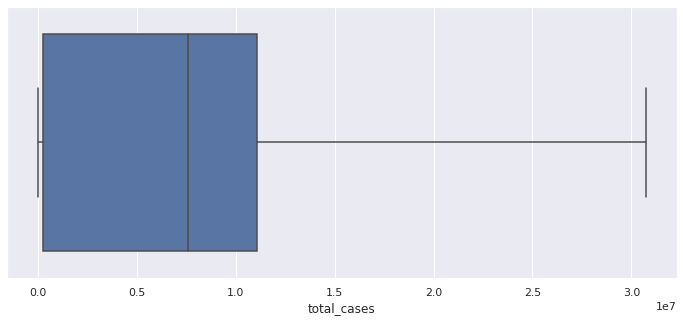

In [18]:
fig = plt.subplots(figsize=(12, 5))
ax = sns.boxplot(x=covid1['total_cases'],whis=3)

Histogram Plot

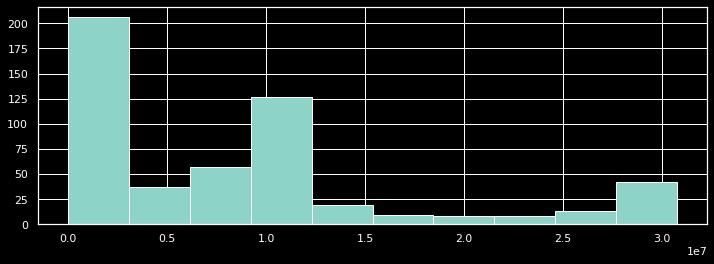

In [19]:
plt.style.use('dark_background')
fig = covid1.total_cases.hist(figsize = (12,4))

**Time series Decomposition**

Additive seasonal decomposition

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


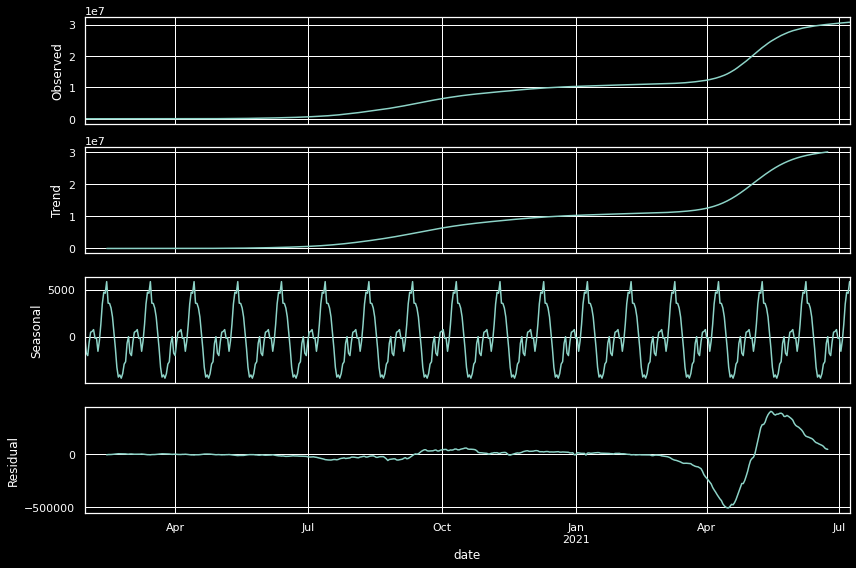

In [20]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = [12, 8]
decomposition = sm.tsa.seasonal_decompose(covid1.total_cases, model='additive',freq=30) # additive seasonal index
fig = decomposition.plot()
plt.show()

Multiplicative seasonal decomposition

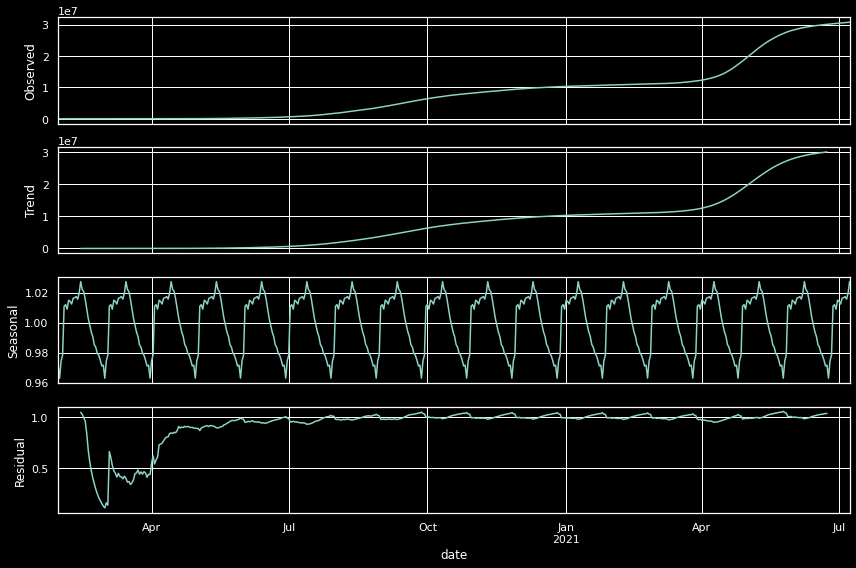

In [21]:
decomposition = sm.tsa.seasonal_decompose(covid1.total_cases, model='multiplicative',freq=30) # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

In [22]:
covid1.shape

(526, 1)

Build and evaluate time series forecast

Split time series data into training and test set

In [23]:
train_len = 400
train = covid1[0:train_len] 
test = covid1[train_len:] 

In [24]:
train.shape

(400, 1)

In [25]:
test.shape

(126, 1)

Simple time series methods

Naive method

In [26]:
train_len-1

399

In [27]:
train.head()

,total_cases
date,
2020-01-30,1.0
2020-01-31,1.0
2020-02-01,1.0
2020-02-02,2.0
2020-02-03,3.0


In [28]:
train.iloc[399]

total_cases    11173761.0
Name: 2021-03-04 00:00:00, dtype: float64

In [29]:
train["total_cases"][train_len-1]

11173761.0

Plot train, test and forecast

In [31]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['total_cases'][train_len-1]

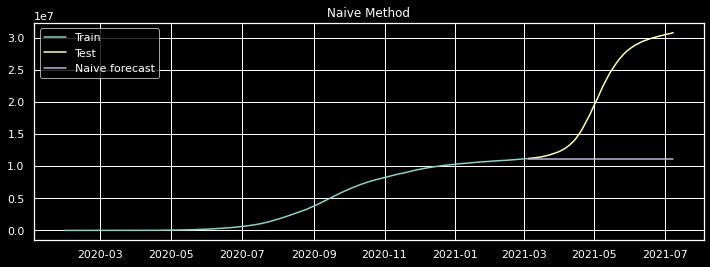

In [32]:
plt.figure(figsize=(12,4))
plt.plot(train['total_cases'], label='Train')
plt.plot(test['total_cases'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

Calculate RMSE and MAPE

In [33]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['total_cases'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['total_cases']-y_hat_naive['naive_forecast'])/test['total_cases'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12438576.56,38.5


Holt's method with trend

In [34]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['total_cases']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_slope': 0.01, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 1.0, 'initial_slope': 0.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


Plot train, test and forecast

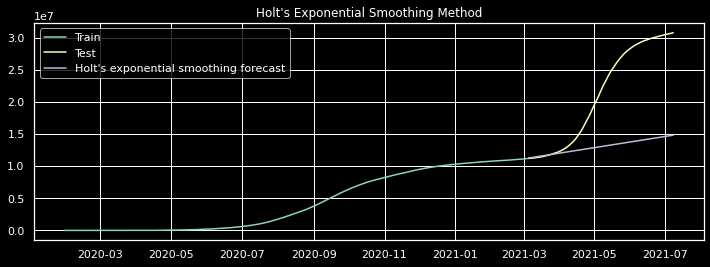

In [35]:
plt.figure(figsize=(12,4))
plt.plot( train['total_cases'], label='Train')
plt.plot(test['total_cases'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

Calculate RSME and MAPE

In [36]:
rmse = np.sqrt(mean_squared_error(test['total_cases'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['total_cases']-y_hat_holt['holt_forecast'])/test['total_cases'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12438576.56,38.50
0,Holt's exponential smoothing method,10353649.66,30.65


	Holt's exponential smoothing method Multiplicative method

In [37]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['total_cases']) ,seasonal_periods=12 ,trend='multiplicative', seasonal=None)
model_fit = model.fit(smoothing_level=0.3, smoothing_slope=0.02, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.3, 'smoothing_slope': 0.02, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 1.0, 'initial_slope': 1.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


Plot train, test and forecast

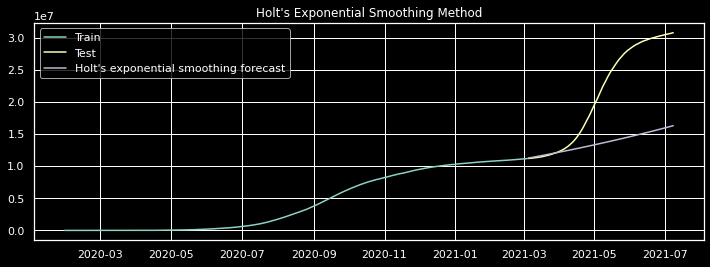

In [38]:
plt.figure(figsize=(12,4))
plt.plot( train['total_cases'], label='Train')
plt.plot(test['total_cases'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

Calculate RSME and MAPE

In [39]:
rmse = np.sqrt(mean_squared_error(test['total_cases'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['total_cases']-y_hat_holt['holt_forecast'])/test['total_cases'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method Multiplicative'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12438576.56,38.50
0,Holt's exponential smoothing method,10353649.66,30.65
0,Holt's exponential smoothing method Multiplica...,9645911.97,28.46


Holt Winters' additive method with trend and seasonality



In [40]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['total_cases']) ,seasonal_periods=30 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.9999999968523328, 'smoothing_slope': 0.47001455618950366, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 4339142.214285715, 'initial_slope': 8.36, 'initial_seasons': array([-4338862.68062557, -4339219.52878963, -4339419.74794586,
       -4339101.05703376, -4338975.93593322, -4338732.12662859,
       -4339435.47953165, -4339796.02177607, -4338743.94768578,
       -4339310.61961503, -4339242.64853616, -4339080.84781582,
       -4339420.70321015, -4338746.164134  , -4340008.80080557,
       -4338350.89753407, -4339344.60515446, -4338972.98066892,
       -4339018.78726555, -4339166.55048048, -4339168.02811263,
       -4339138.47546964, -4339105.96756236, -4339348.29923484,
       -4339031.34713882, -4339050.55635676, -4339238.95445579,
       -4338834.82206296, -4339655.64672189, -4338978.89119752]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [41]:
y_hat_hwa['hw_forecast']

date
2021-03-05    1.119027e+07
2021-03-06    1.120686e+07
2021-03-07    1.122296e+07
2021-03-08    1.124007e+07
2021-03-09    1.125524e+07
                  ...     
2021-07-04    1.317920e+07
2021-07-05    1.319530e+07
2021-07-06    1.321241e+07
2021-07-07    1.322758e+07
2021-07-08    1.324568e+07
Name: hw_forecast, Length: 126, dtype: float64

Plot train, test and forecast

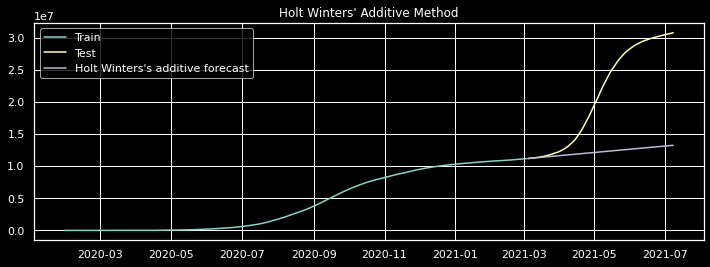

In [42]:
plt.figure(figsize=(12,4))
plt.plot( train['total_cases'], label='Train')
plt.plot(test['total_cases'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()


Calculate RMSE and MAPE

In [43]:
rmse = np.sqrt(mean_squared_error(test['total_cases'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['total_cases']-y_hat_hwa['hw_forecast'])/test['total_cases'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12438576.56,38.50
0,Holt's exponential smoothing method,10353649.66,30.65
0,Holt's exponential smoothing method Multiplica...,9645911.97,28.46
0,Holt Winters' additive method,11257447.44,33.99


Holt Winter's multiplicative method with trend and seasonality

In [44]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['total_cases']) ,seasonal_periods=30 ,trend='mul', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2631578947368421, 'smoothing_slope': 0.05263157894736842, 'smoothing_seasonal': 0.5263157894736842, 'damping_slope': nan, 'initial_level': 4339142.214285715, 'initial_slope': 1.162530914882814, 'initial_seasons': array([2.30460296e-07, 2.30460296e-07, 2.30460296e-07, 4.60920592e-07,
       6.91380889e-07, 6.91380889e-07, 6.91380889e-07, 6.91380889e-07,
       6.91380889e-07, 6.91380889e-07, 6.91380889e-07, 6.91380889e-07,
       6.91380889e-07, 6.91380889e-07, 6.91380889e-07, 6.91380889e-07,
       6.91380889e-07, 6.91380889e-07, 6.91380889e-07, 6.91380889e-07,
       6.91380889e-07, 6.91380889e-07, 6.91380889e-07, 6.91380889e-07,
       6.91380889e-07, 6.91380889e-07, 6.91380889e-07, 6.91380889e-07,
       6.91380889e-07, 6.91380889e-07]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


Plot train, test and forecast

In [45]:
y_hat_hwm['hw_forecast']

date
2021-03-05    1.121281e+07
2021-03-06    1.122094e+07
2021-03-07    1.122670e+07
2021-03-08    1.123188e+07
2021-03-09    1.123159e+07
                  ...     
2021-07-04    1.255492e+07
2021-07-05    1.256137e+07
2021-07-06    1.256716e+07
2021-07-07    1.256683e+07
2021-07-08    1.257584e+07
Name: hw_forecast, Length: 126, dtype: float64

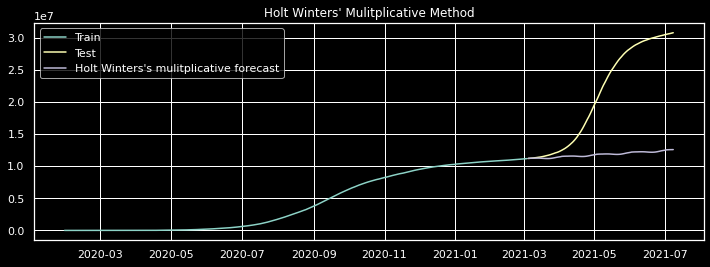

In [46]:
plt.figure(figsize=(12,4))
plt.plot( train['total_cases'], label='Train')
plt.plot(test['total_cases'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

Calculate RMSE and MAPE

In [47]:
rmse = np.sqrt(mean_squared_error(test['total_cases'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['total_cases']-y_hat_hwm['hw_forecast'])/test['total_cases'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12438576.56,38.50
0,Holt's exponential smoothing method,10353649.66,30.65
0,Holt's exponential smoothing method Multiplica...,9645911.97,28.46
0,Holt Winters' additive method,11257447.44,33.99
0,Holt Winters' multiplicative method,11706461.41,35.90


Auto Regressive methods

Stationarity vs non-stationary time series

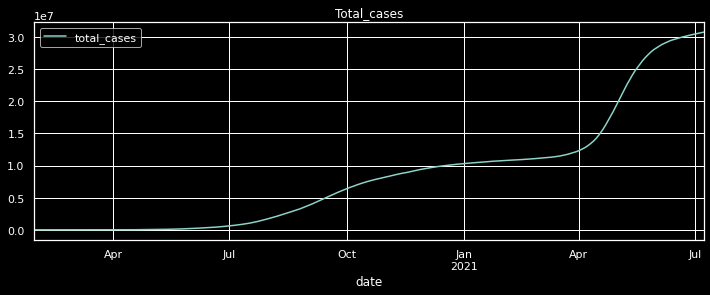

In [48]:
covid1['total_cases'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Total_cases')
plt.show(block=False)

Augmented Dickey-Fuller (ADF) test

In [49]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(covid1['total_cases'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: 2.065764
Critical Values @ 0.05: -2.87
p-value: 0.998753


Since the p-value > 0.05, the TS is not Stationary.

Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [50]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(covid1['total_cases'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 2.304316
Critical Values @ 0.05: 0.46
p-value: 0.010000


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


Since the p-value <= 0.05, the TS is not Stationary.

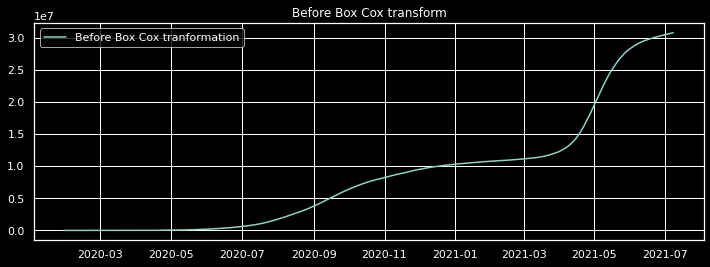

In [51]:
from scipy.stats import boxcox
temp = pd.Series(covid1['total_cases'], index = covid1.index)

plt.figure(figsize=(12,4))
plt.plot(temp, label='Before Box Cox tranformation')
plt.legend(loc='best')
plt.title('Before Box Cox transform')
plt.show()

Box Cox transformation to make variance constant

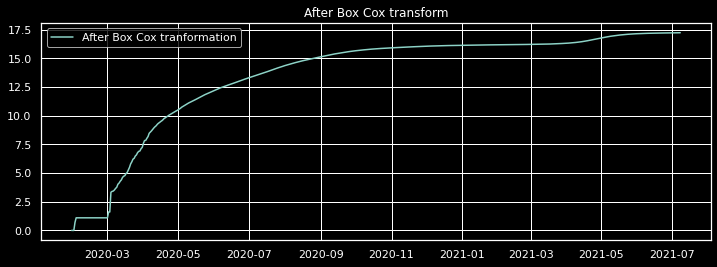

In [52]:
from scipy.stats import boxcox
covid1_boxcox = pd.Series(boxcox(covid1['total_cases'], lmbda=0), index = covid1.index)

plt.figure(figsize=(12,4))
plt.plot(covid1_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

Differencing to remove trend

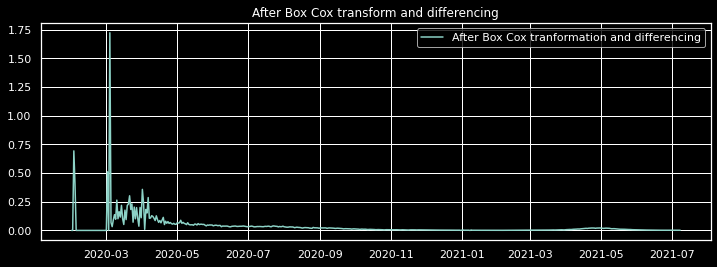

In [53]:
covid1_boxcox_diff = pd.Series(covid1_boxcox - covid1_boxcox.shift(), covid1.index)
plt.figure(figsize=(12,4))
plt.plot(covid1_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [54]:
covid1_boxcox_diff.head()

date
2020-01-30         NaN
2020-01-31    0.000000
2020-02-01    0.000000
2020-02-02    0.693147
2020-02-03    0.405465
dtype: float64

In [55]:
covid1_boxcox_diff.dropna(inplace=True)

In [56]:
covid1_boxcox_diff.head()

date
2020-01-31    0.000000
2020-02-01    0.000000
2020-02-02    0.693147
2020-02-03    0.405465
2020-02-04    0.000000
dtype: float64

In [57]:
covid1_boxcox_diff.tail()

date
2021-07-04    0.001302
2021-07-05    0.001134
2021-07-06    0.001427
2021-07-07    0.001496
2021-07-08    0.001412
dtype: float64

In [58]:
covid1_boxcox_diff.shape

(525,)

Augmented Dickey-Fuller (ADF) test

In [59]:
adf_test = adfuller(covid1_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -3.685089
Critical Values @ 0.05: -2.87
p-value: 0.004328


Since the p-value <= 0.05, the TS is Stationary.

Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [60]:
kpss_test = kpss(covid1_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 1.427865
Critical Values @ 0.05: 0.46
p-value: 0.010000


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


Since the p-value > 0.05, the TS is Stationary.

Autocorrelation function (ACF)

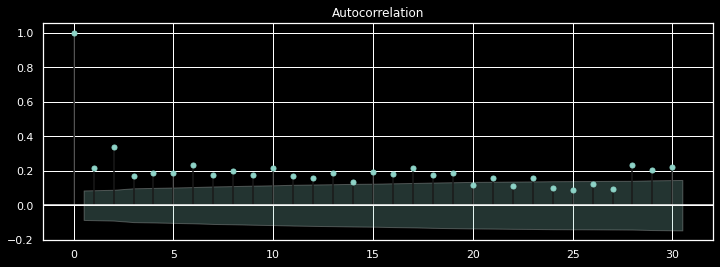

In [61]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(covid1_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()


Partial autocorrelation function (PACF)

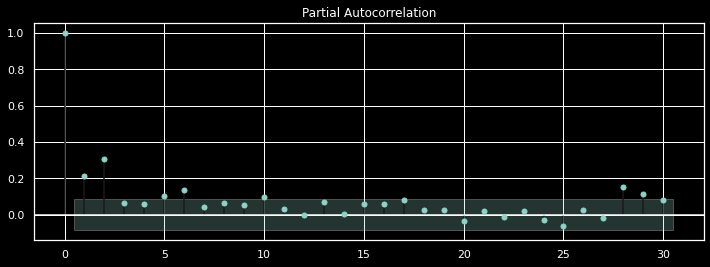

In [62]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(covid1_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

In [63]:
train_len

400

In [64]:
covid1_boxcox.head()

date
2020-01-30    0.000000
2020-01-31    0.000000
2020-02-01    0.000000
2020-02-02    0.693147
2020-02-03    1.098612
dtype: float64

In [65]:
covid1_boxcox.shape

(526,)

In [66]:
covid1_boxcox_diff.head()

date
2020-01-31    0.000000
2020-02-01    0.000000
2020-02-02    0.693147
2020-02-03    0.405465
2020-02-04    0.000000
dtype: float64

In [67]:
covid1_boxcox_diff.shape

(525,)

Split into train and test data

In [68]:
train_covid1_boxcox = covid1_boxcox[:train_len]
test_covid1_boxcox = covid1_boxcox[train_len:]
train_covid1_boxcox_diff = covid1_boxcox_diff[:train_len-1]
# train_len-1 because we dropped the 1st row from the box-cox-difference dataframe
test_covid1_boxcox_diff = covid1_boxcox_diff[train_len-1:]

In [69]:
train_covid1_boxcox.shape

(400,)

In [70]:
test_covid1_boxcox.shape

(126,)

In [71]:
train_covid1_boxcox_diff.shape

(399,)

In [72]:
test_covid1_boxcox_diff.shape

(126,)


Auto regression method (AR)

In [73]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_covid1_boxcox_diff, order=(1, 0, 0)) 
#  order=(1, 0, 0) -> lag order is 1 in AR model i.e. AR(1) Model
model_fit = model.fit()
print(model_fit.params)

const      0.040626
ar.L1.y    0.195274
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


const      0.040626 i.e. beta_0
ar.L1.y    0.195274 i.e. beta_1


Recover original time series

In [74]:
y_hat_ar = covid1_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(covid1_boxcox_diff.index.min(), covid1_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(covid1_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

In [75]:
y_hat_ar['ar_forecast_boxcox_diff']

2020-01-31    0.040626
2020-02-01    0.032693
2020-02-02    0.032693
2020-02-03    0.168046
2020-02-04    0.111870
                ...   
2021-07-04    0.040626
2021-07-05    0.040626
2021-07-06    0.040626
2021-07-07    0.040626
2021-07-08    0.040626
Freq: D, Length: 525, dtype: float64

In [76]:
y_hat_ar['ar_forecast_boxcox']

2020-01-31     0.040626
2020-02-01     0.073319
2020-02-02     0.106011
2020-02-03     0.274058
2020-02-04     0.385927
                ...    
2021-07-04    21.168009
2021-07-05    21.208635
2021-07-06    21.249261
2021-07-07    21.289887
2021-07-08    21.330512
Freq: D, Length: 525, dtype: float64

In [77]:
y_hat_ar['ar_forecast']

2020-01-31    1.041462e+00
2020-02-01    1.076073e+00
2020-02-02    1.111834e+00
2020-02-03    1.315291e+00
2020-02-04    1.470978e+00
                  ...     
2021-07-04    1.560089e+09
2021-07-05    1.624774e+09
2021-07-06    1.692141e+09
2021-07-07    1.762302e+09
2021-07-08    1.835371e+09
Freq: D, Length: 525, dtype: float64

Plot train, test and forecast

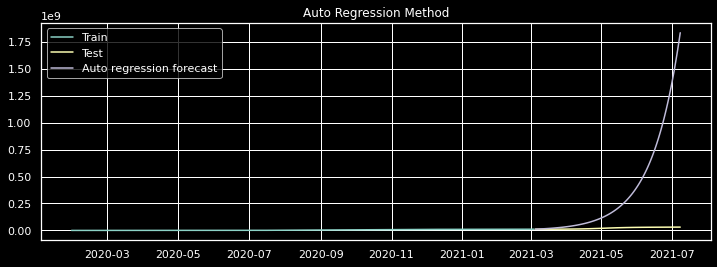

In [78]:
plt.figure(figsize=(12,4))
plt.plot(train['total_cases'], label='Train')
plt.plot(test['total_cases'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

Calculate RMSE and MAPE

In [79]:
rmse = np.sqrt(mean_squared_error(test['total_cases'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['total_cases']-y_hat_ar['ar_forecast'][test.index.min():])/test['total_cases'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1.243858e+07,38.50
0,Holt's exponential smoothing method,1.035365e+07,30.65
0,Holt's exponential smoothing method Multiplica...,9.645912e+06,28.46
0,Holt Winters' additive method,1.125745e+07,33.99
0,Holt Winters' multiplicative method,1.170646e+07,35.90
0,Autoregressive (AR) method,5.677437e+08,1218.78


Moving average method (MA)

In [80]:
model = ARIMA(train_covid1_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const      0.040655
ma.L1.y    0.124580
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Recover original time series

In [81]:
y_hat_ma = covid1_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(covid1_boxcox_diff.index.min(), covid1_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(covid1_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

In [82]:
y_hat_ma['ma_forecast_boxcox_diff']

2020-01-31    0.040655
2020-02-01    0.035668
2020-02-02    0.036213
2020-02-03    0.122496
2020-02-04    0.075908
                ...   
2021-07-04    0.040655
2021-07-05    0.040655
2021-07-06    0.040655
2021-07-07    0.040655
2021-07-08    0.040655
Freq: D, Length: 525, dtype: float64

In [83]:
y_hat_ma['ma_forecast_boxcox']

2020-01-31     0.040655
2020-02-01     0.076323
2020-02-02     0.112536
2020-02-03     0.235032
2020-02-04     0.310940
                ...    
2021-07-04    21.181860
2021-07-05    21.222515
2021-07-06    21.263170
2021-07-07    21.303826
2021-07-08    21.344481
Freq: D, Length: 525, dtype: float64

In [84]:
y_hat_ma['ma_forecast'] 

2020-01-31    1.041493e+00
2020-02-01    1.079311e+00
2020-02-02    1.119113e+00
2020-02-03    1.264950e+00
2020-02-04    1.364707e+00
                  ...     
2021-07-04    1.581848e+09
2021-07-05    1.647484e+09
2021-07-06    1.715843e+09
2021-07-07    1.787038e+09
2021-07-08    1.861188e+09
Freq: D, Length: 525, dtype: float64

Plot train, test and forecast

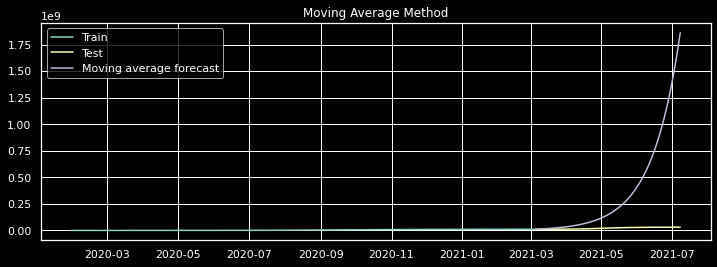

In [85]:
plt.figure(figsize=(12,4))
plt.plot(covid1['total_cases'][:train_len], label='Train')
plt.plot(covid1['total_cases'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

Calculate RMSE and MAPE

In [86]:
rmse = np.sqrt(mean_squared_error(test['total_cases'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['total_cases']-y_hat_ma['ma_forecast'][test.index.min():])/test['total_cases'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1.243858e+07,38.50
0,Holt's exponential smoothing method,1.035365e+07,30.65
0,Holt's exponential smoothing method Multiplica...,9.645912e+06,28.46
0,Holt Winters' additive method,1.125745e+07,33.99
0,Holt Winters' multiplicative method,1.170646e+07,35.90
0,Autoregressive (AR) method,5.677437e+08,1218.78
0,Moving Average (MA) method,5.757728e+08,1236.22


Auto regression moving average method (ARMA)

In [87]:
model = ARIMA(train_covid1_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const      0.042112
ar.L1.y    0.979770
ma.L1.y   -0.897442
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Recover original time series

In [88]:
y_hat_arma = covid1_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(covid1_boxcox_diff.index.min(), covid1_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(covid1_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

In [89]:

y_hat_arma['arma_forecast_boxcox_diff']

2020-01-31    0.042112
2020-02-01    0.033175
2020-02-02    0.027516
2020-02-03    0.128945
2020-02-04    0.164544
                ...   
2021-07-04    0.039351
2021-07-05    0.039407
2021-07-06    0.039461
2021-07-07    0.039515
2021-07-08    0.039567
Freq: D, Length: 525, dtype: float64

In [90]:
y_hat_arma['arma_forecast_boxcox']

2020-01-31     0.042112
2020-02-01     0.075287
2020-02-02     0.102803
2020-02-03     0.231748
2020-02-04     0.396292
                ...    
2021-07-04    20.615724
2021-07-05    20.655130
2021-07-06    20.694591
2021-07-07    20.734106
2021-07-08    20.773674
Freq: D, Length: 525, dtype: float64

In [91]:
y_hat_arma['arma_forecast'] 

2020-01-31    1.043011e+00
2020-02-01    1.078193e+00
2020-02-02    1.108273e+00
2020-02-03    1.260802e+00
2020-02-04    1.486303e+00
                  ...     
2021-07-04    8.980386e+08
2021-07-05    9.341337e+08
2021-07-06    9.717328e+08
2021-07-07    1.010899e+09
2021-07-08    1.051700e+09
Freq: D, Length: 525, dtype: float64

Plot train, test and forecast

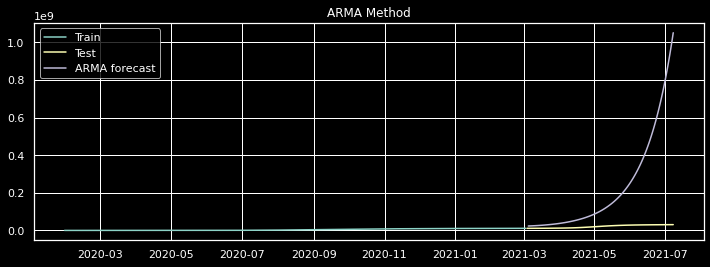

In [92]:
plt.figure(figsize=(12,4))
plt.plot( covid1['total_cases'][:train_len-1], label='Train')
plt.plot(covid1['total_cases'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

Calculate RMSE and MAPE

In [93]:
rmse = np.sqrt(mean_squared_error(test['total_cases'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['total_cases']-y_hat_arma['arma_forecast'][train_len-1:])/test['total_cases'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1.243858e+07,38.50
0,Holt's exponential smoothing method,1.035365e+07,30.65
0,Holt's exponential smoothing method Multiplica...,9.645912e+06,28.46
0,Holt Winters' additive method,1.125745e+07,33.99
0,Holt Winters' multiplicative method,1.170646e+07,35.90
0,Autoregressive (AR) method,5.677437e+08,1218.78
0,Moving Average (MA) method,5.757728e+08,1236.22
0,Autoregressive moving average (ARMA) method,3.254987e+08,753.07


Auto regressive integrated moving average (ARIMA)

In [94]:
model = ARIMA(train_covid1_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

const        0.042112
ar.L1.D.y    0.979770
ma.L1.D.y   -0.897442
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Recover original time series forecast

In [95]:
y_hat_arima = covid1_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(covid1_boxcox_diff.index.min(), covid1_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(covid1_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

Plot train, test and forecast


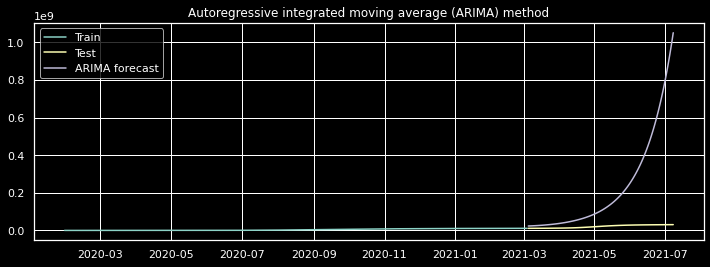

In [96]:
plt.figure(figsize=(12,4))
plt.plot(train['total_cases'], label='Train')
plt.plot(test['total_cases'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

Calculate RMSE and MAPE

In [97]:
rmse = np.sqrt(mean_squared_error(test['total_cases'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['total_cases']-y_hat_arima['arima_forecast'][test.index.min():])/test['total_cases'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1.243858e+07,38.50
0,Holt's exponential smoothing method,1.035365e+07,30.65
0,Holt's exponential smoothing method Multiplica...,9.645912e+06,28.46
0,Holt Winters' additive method,1.125745e+07,33.99
0,Holt Winters' multiplicative method,1.170646e+07,35.90
0,Autoregressive (AR) method,5.677437e+08,1218.78
0,Moving Average (MA) method,5.757728e+08,1236.22
0,Autoregressive moving average (ARMA) method,3.254987e+08,753.07
0,Autoregressive integrated moving average (ARIM...,3.254987e+08,753.07


Seasonal auto regressive integrated moving average (SARIMA)

In [98]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_covid1_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ar.L1       0.986279
ma.L1      -0.903798
ar.S.L12   -0.028661
ma.S.L12   -0.996773
sigma2      0.009917
dtype: float64


Recover original time series forecast


In [99]:
y_hat_sarima = covid1_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(covid1_boxcox_diff.index.min(), covid1_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

Plot train, test and forecast

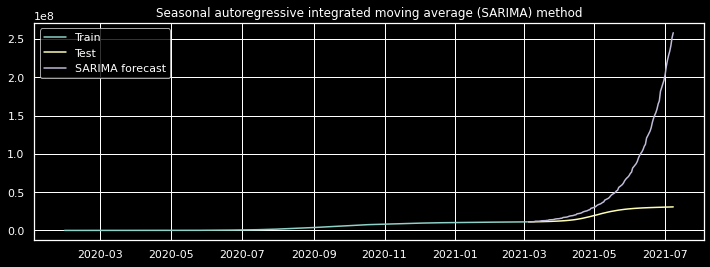

In [100]:
plt.figure(figsize=(12,4))
plt.plot(train['total_cases'], label='Train')
plt.plot(test['total_cases'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

Calculate RMSE and MAPE

In [101]:
rmse = np.sqrt(mean_squared_error(test['total_cases'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['total_cases']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['total_cases'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1.243858e+07,38.50
0,Holt's exponential smoothing method,1.035365e+07,30.65
0,Holt's exponential smoothing method Multiplica...,9.645912e+06,28.46
0,Holt Winters' additive method,1.125745e+07,33.99
0,Holt Winters' multiplicative method,1.170646e+07,35.90
0,Autoregressive (AR) method,5.677437e+08,1218.78
0,Moving Average (MA) method,5.757728e+08,1236.22
0,Autoregressive moving average (ARMA) method,3.254987e+08,753.07
0,Autoregressive integrated moving average (ARIM...,3.254987e+08,753.07
0,Seasonal autoregressive integrated moving aver...,7.269271e+07,154.35


Seasonal auto regressive integrate moving average with exogenous variable (SARIMAX)

In [102]:
model = SARIMAX(train_covid1_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), exog=train) 
model_fit = model.fit()
print(model_fit.params)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


total_cases    6.484249e-08
ar.L1         -3.043408e-02
ma.L1          4.780607e-02
ar.S.L12      -2.013795e-02
ma.S.L12      -5.559833e-03
sigma2         1.757254e-02
dtype: float64


Recover original time series forecast

In [103]:
y_hat_sarimax = covid1_boxcox_diff.copy()
y_hat_sarimax['sarimax_forecast_boxcox'] = model_fit.predict(covid1_boxcox_diff.index.min(), covid1_boxcox_diff.index.max(), exog=test)
y_hat_sarimax['sarimax_forecast'] = np.exp(y_hat_sarimax['sarimax_forecast_boxcox'])

Plot train, test and forecast

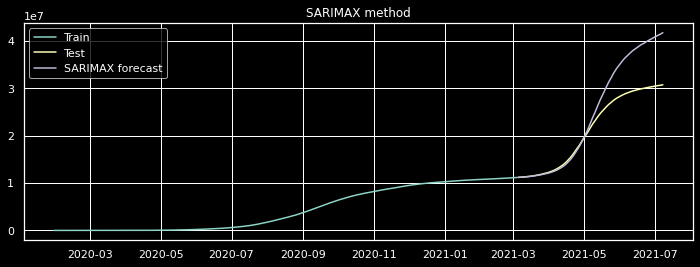

In [104]:
plt.figure(figsize=(12,4))
plt.plot(train['total_cases'], label='Train')
plt.plot(test['total_cases'], label='Test')
plt.plot(y_hat_sarimax['sarimax_forecast'][test.index.min():], label='SARIMAX forecast')
plt.legend(loc='best')
plt.title('SARIMAX method')
plt.show()

Calculate RMSE and MAPE

In [105]:
rmse = np.sqrt(mean_squared_error(test['total_cases'], y_hat_sarimax['sarimax_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['total_cases']-y_hat_sarimax['sarimax_forecast'][test.index.min():])/test['total_cases'])*100,2)

tempResults = pd.DataFrame({'Method':['SARIMAX method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1.243858e+07,38.50
0,Holt's exponential smoothing method,1.035365e+07,30.65
0,Holt's exponential smoothing method Multiplica...,9.645912e+06,28.46
0,Holt Winters' additive method,1.125745e+07,33.99
0,Holt Winters' multiplicative method,1.170646e+07,35.90
0,Autoregressive (AR) method,5.677437e+08,1218.78
0,Moving Average (MA) method,5.757728e+08,1236.22
0,Autoregressive moving average (ARMA) method,3.254987e+08,753.07
0,Autoregressive integrated moving average (ARIM...,3.254987e+08,753.07
0,Seasonal autoregressive integrated moving aver...,7.269271e+07,154.35
